# Ejercicio análisis time series
Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide
1. Importa los datos 'df_furniture.csv'
2. Trata la fecha como texto. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional
9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")

## 1. Importa los datos 'df_furniture.csv'

In [52]:
df = pd.read_csv("data\df_furniture.csv")
df

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618
...,...,...
326,2019-03-01,9718.107698
327,2019-04-01,9248.814254
328,2019-05-01,10001.305304
329,2019-06-01,9431.337229


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     326 non-null    object 
 1   furniture_price_adjusted  331 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB


In [10]:
# tamaño de la muestra
df.shape[0]

331

In [54]:
df['Month'] = pd.to_datetime(df['Month'])
df

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618
...,...,...
326,2019-03-01,9718.107698
327,2019-04-01,9248.814254
328,2019-05-01,10001.305304
329,2019-06-01,9431.337229


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     326 non-null    object 
 1   furniture_price_adjusted  331 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB


In [19]:
min_date = df["Month"].min()
print(min_date)

1992-01-01 00:00:00


In [20]:
# fecha máxima de la muestra
max_date = df["Month"].max()
print(max_date)

2019-07-01 00:00:00


In [27]:
# valores nulos
df[df["Month"].isnull()]

,Month,furniture_price_adjusted
15,NaT,2457.704334
21,NaT,2715.938414
39,NaT,2857.008678
40,NaT,3086.648631
60,NaT,3298.628987


In [25]:
# contamos los valores nulos en la columna Month
null_count = df["Month"].isnull().sum()
print(null_count)

5


In [26]:
#Otra forma
null_count = 0
for valor in df["Month"]:
    if pd.isnull(valor):
        null_count += 1
print(null_count)

5


In [55]:

import pandas as pd

# Supongamos que este es tu DataFrame original

# Asegurarse de que la columna 'furniture_price_adjusted' sea de tipo float
df['furniture_price_adjusted'] = pd.to_numeric(df['furniture_price_adjusted'], errors='coerce')

# Generar el rango de fechas completo desde la primera fecha hasta la última
full_date_range = pd.date_range(start=df['Month'].min(), end=df['Month'].max(), freq='MS')

# Crear un DataFrame temporal con el rango de fechas completo
temp_df = pd.DataFrame({'Month': full_date_range})

# Hacer un merge del DataFrame original con el DataFrame temporal para completar las fechas faltantes
df_full = pd.merge(temp_df, df, on='Month', how='left')

# Rellenar los valores nulos en 'furniture_price_adjusted' utilizando interpolación
df_full['furniture_price_adjusted'] = df_full['furniture_price_adjusted'].interpolate()

print("DataFrame con valores nulos rellenados:")
print(df_full)

DataFrame con valores nulos rellenados:
         Month  furniture_price_adjusted
0   1992-01-01               2073.432724
1   1992-02-01               2114.485812
2   1992-03-01               2260.570891
3   1992-04-01               2255.103236
4   1992-05-01               2331.414618
..         ...                       ...
326 2019-03-01               9718.107698
327 2019-04-01               9248.814254
328 2019-05-01              10001.305304
329 2019-06-01               9431.337229
330 2019-07-01               9887.800688

[331 rows x 2 columns]


In [56]:
df_full

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618
...,...,...
326,2019-03-01,9718.107698
327,2019-04-01,9248.814254
328,2019-05-01,10001.305304
329,2019-06-01,9431.337229


In [57]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     331 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


## 2. Trata la fecha como texto y parsea. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas


In [67]:
df_full["Month"] = df_full["Month"].astype(str) #cambiamos a formato texto


In [68]:
# Superconsejito: Haz un copy del df original para no pisarlo

# Esta parte del ejercicio es para repasar cómo parsear en caso de que recibas una fecha que no sea datetime, aunque no sea el caso

df_full[['year', 'day', 'month']] = df_full['Month'].str.split('-', expand=True)
df_full

,Month,furniture_price_adjusted,year,day,month
0,1992-01-01,2073.432724,1992,01,01
1,1992-02-01,2114.485812,1992,02,01
2,1992-03-01,2260.570891,1992,03,01
3,1992-04-01,2255.103236,1992,04,01
4,1992-05-01,2331.414618,1992,05,01
...,...,...,...,...,...
326,2019-03-01,9718.107698,2019,03,01
327,2019-04-01,9248.814254,2019,04,01
328,2019-05-01,10001.305304,2019,05,01
329,2019-06-01,9431.337229,2019,06,01


In [69]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     331 non-null    object 
 1   furniture_price_adjusted  331 non-null    float64
 2   year                      331 non-null    object 
 3   day                       331 non-null    object 
 4   month                     331 non-null    object 
dtypes: float64(1), object(4)
memory usage: 13.1+ KB


In [72]:
# creamos una nueva columna que es new_date a partir de las 3 columnas nuevas creadas

# using apply function to create a new column
df_full['new_date'] = df_full.apply(lambda row: row.year + '-' + row.month +  '-' + row.day
                                , axis = 1)
 
# Print the DataFrame after addition
# of new column
print(df_full)

          Month  furniture_price_adjusted  year day month    new_date
0    1992-01-01               2073.432724  1992  01    01  1992-01-01
1    1992-02-01               2114.485812  1992  02    01  1992-01-02
2    1992-03-01               2260.570891  1992  03    01  1992-01-03
3    1992-04-01               2255.103236  1992  04    01  1992-01-04
4    1992-05-01               2331.414618  1992  05    01  1992-01-05
..          ...                       ...   ...  ..   ...         ...
326  2019-03-01               9718.107698  2019  03    01  2019-01-03
327  2019-04-01               9248.814254  2019  04    01  2019-01-04
328  2019-05-01              10001.305304  2019  05    01  2019-01-05
329  2019-06-01               9431.337229  2019  06    01  2019-01-06
330  2019-07-01               9887.800688  2019  07    01  2019-01-07

[331 rows x 6 columns]


## 3. ¿De qué fecha a qué fecha va el histórico?

In [74]:
df

,Month,furniture_price_adjusted,year,day,month
0,1992-01-01,2073.432724,1992,01,01
1,1992-02-01,2114.485812,1992,02,01
2,1992-03-01,2260.570891,1992,03,01
3,1992-04-01,2255.103236,1992,04,01
4,1992-05-01,2331.414618,1992,05,01
...,...,...,...,...,...
326,2019-03-01,9718.107698,2019,03,01
327,2019-04-01,9248.814254,2019,04,01
328,2019-05-01,10001.305304,2019,05,01
329,2019-06-01,9431.337229,2019,06,01


In [18]:
# min de la serie
# max de la serie

1992-01-01 00:00:00
2019-07-01 00:00:00


La serie va desde enero de 1992 a julio de 2019

In [19]:
# cálcula el tamaño de la serie en años

27.496235455167692

## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

In [ ]:
df

,furniture_price_adjusted
Date,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618
...,...
2019-03-01,9718.107698
2019-04-01,9248.814254
2019-05-01,10001.305304


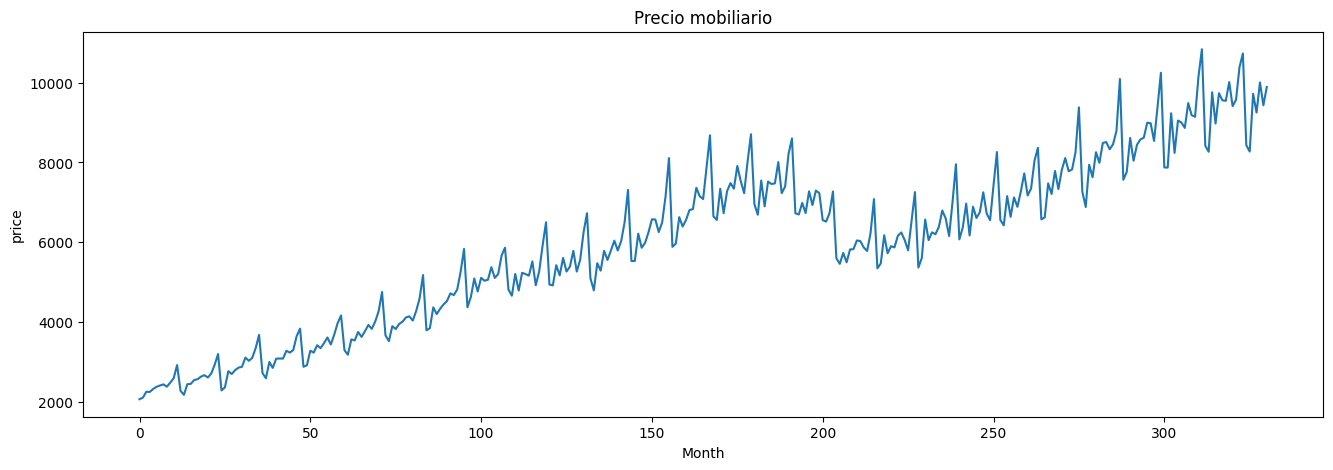

In [76]:
def plot_df(df, x, y, title="", xlabel='Month', ylabel='price', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df["furniture_price_adjusted"], title='Precio mobiliario') 

Se ve que tiene una tendencia al alza, a pesar de descenso en las acciones en el 2007.

También apreciamos estacionalidad, al cumplirse cierto patrón a lo largo del tiempo

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

In [22]:
df

,furniture_price_adjusted
Date,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618
...,...
2019-03-01,9718.107698
2019-04-01,9248.814254
2019-05-01,10001.305304


In [77]:
from statsmodels.tsa.stattools import adfuller

In [78]:
# adfuller

result = adfuller(df["furniture_price_adjusted"].values)
result[1]

0.7035529748089981

In [81]:
# describe toda la serie
df[["furniture_price_adjusted"]].describe()

,furniture_price_adjusted
count,331.000000
mean,5975.765787
std,2092.867819
min,2073.432724
25%,4280.088499
50%,6075.405272
75%,7381.403461
max,10833.501852


In [82]:
#solo la primera mitad de la serie
length = len(df["furniture_price_adjusted"])
firsthalf = df["furniture_price_adjusted"].iloc[:length//2]
print(firsthalf.describe())

count     165.000000
mean     4366.695881
std      1412.738867
min      2073.432724
25%      3115.400080
50%      4275.168742
75%      5428.334524
max      8110.153770
Name: furniture_price_adjusted, dtype: float64


## 6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?


In [83]:
from statsmodels.nonparametric.smoothers_lowess import lowess

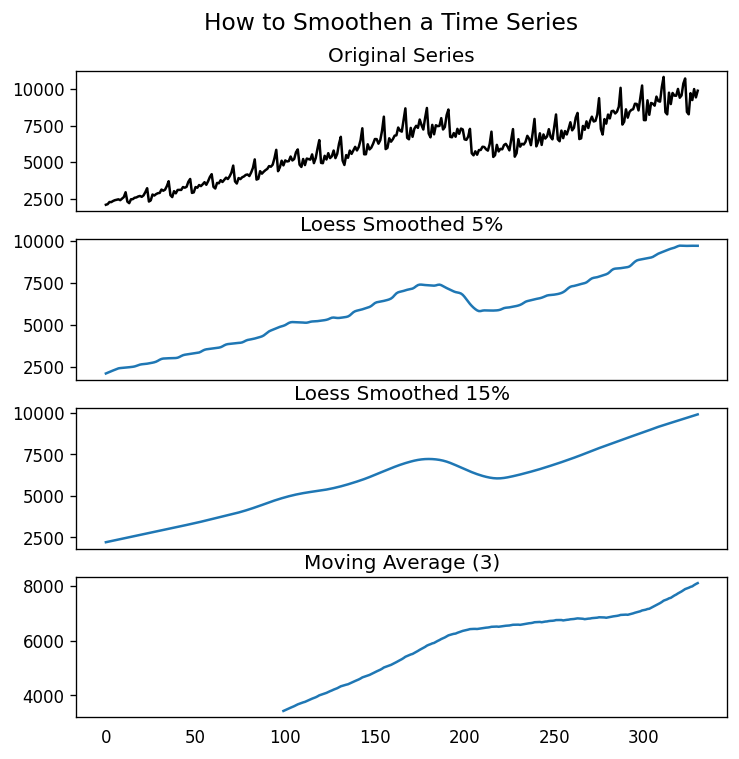

In [84]:
import matplotlib.pyplot as plt

plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# 1. Moving Average
df_ma = df['furniture_price_adjusted'].rolling(100).mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df['furniture_price_adjusted'], np.arange(len(df['furniture_price_adjusted'])), frac=0.05)[:, 1], index=df.index, columns=['furniture_price_adjusted'])
df_loess_15 = pd.DataFrame(lowess(df['furniture_price_adjusted'], np.arange(len(df['furniture_price_adjusted'])), frac=0.15)[:, 1], index=df.index, columns=['furniture_price_adjusted'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df['furniture_price_adjusted'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['furniture_price_adjusted'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['furniture_price_adjusted'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()


array([[0.00000000e+00, 2.20677961e+03],
       [1.00000000e+00, 2.23030504e+03],
       [2.00000000e+00, 2.25363575e+03],
       [3.00000000e+00, 2.27680618e+03],
       [4.00000000e+00, 2.29985791e+03],
       [5.00000000e+00, 2.32283809e+03],
       [6.00000000e+00, 2.34579369e+03],
       [7.00000000e+00, 2.36876567e+03],
       [8.00000000e+00, 2.39178496e+03],
       [9.00000000e+00, 2.41487011e+03],
       [1.00000000e+01, 2.43802959e+03],
       [1.10000000e+01, 2.46124823e+03],
       [1.20000000e+01, 2.48445239e+03],
       [1.30000000e+01, 2.50744743e+03],
       [1.40000000e+01, 2.52989409e+03],
       [1.50000000e+01, 2.55115574e+03],
       [1.60000000e+01, 2.57010550e+03],
       [1.70000000e+01, 2.58724032e+03],
       [1.80000000e+01, 2.60500821e+03],
       [1.90000000e+01, 2.62421845e+03],
       [2.00000000e+01, 2.64571834e+03],
       [2.10000000e+01, 2.67009595e+03],
       [2.20000000e+01, 2.69702042e+03],
       [2.30000000e+01, 2.72551366e+03],
       [2.400000

<AxesSubplot:xlabel='Date'>

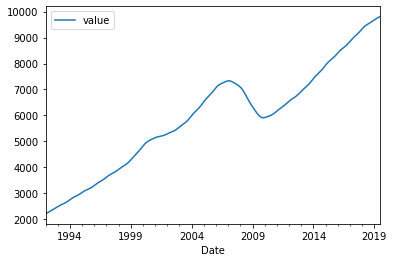

## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

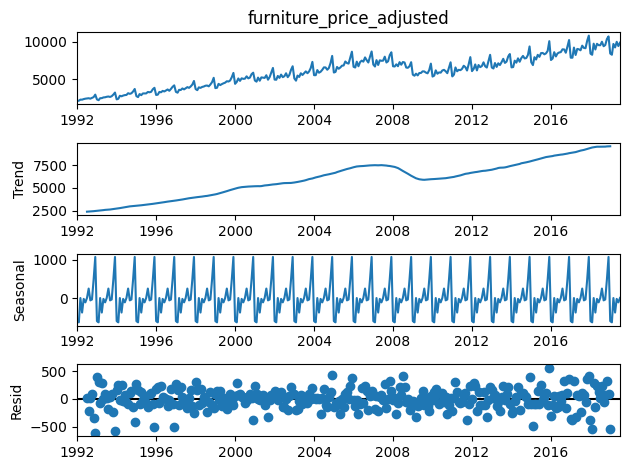

In [48]:
# model = "additive"

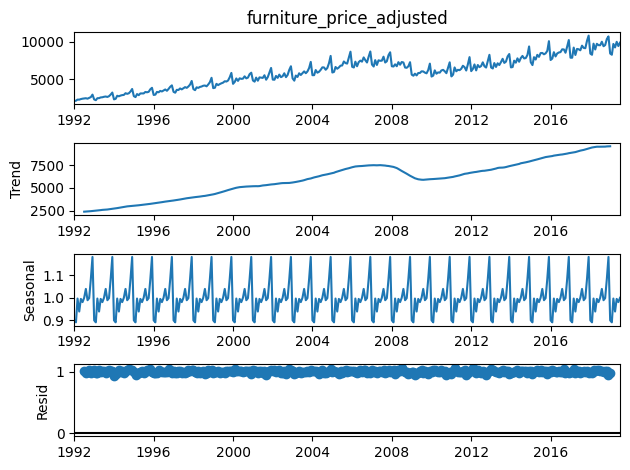

In [49]:
# model = "multiplicative"

## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

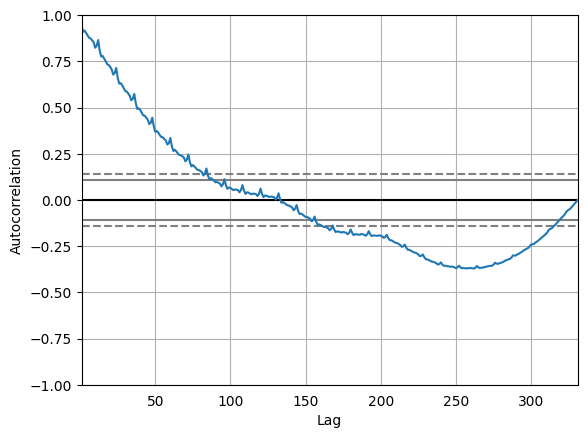

In [85]:

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df["furniture_price_adjusted"].values)

## 9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuestralo mediante una matriz de correlación.

In [90]:
df2 = df

In [ ]:
# Superconsejito: Haz un copy del df original para no pisarlo
df2 = df_full

import pandas as pd
import numpy as np

lags = 5
for i in range(1, lags+1):
    df2[f'lag_{i}'] = df2['Month'].shift(i)

correlation_matrix = df2.corr()

lag_correlation = correlation_matrix.iloc[0, -lags:]

print("Matriz de correlación entre el instante de tiempo actual y sus últimos 5 lags:")
print(lag_correlation)

In [54]:
df_full.head(20)

,furniture_price_adjusted,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
1992-01-01,2073.432724,NaN,NaN,NaN,NaN,NaN
1992-02-01,2114.485812,2073.432724,NaN,NaN,NaN,NaN
1992-03-01,2260.570891,2114.485812,2073.432724,NaN,NaN,NaN
1992-04-01,2255.103236,2260.570891,2114.485812,2073.432724,NaN,NaN
1992-05-01,2331.414618,2255.103236,2260.570891,2114.485812,2073.432724,NaN
1992-06-01,2384.638567,2331.414618,2255.103236,2260.570891,2114.485812,2073.432724
1992-07-01,2417.165376,2384.638567,2331.414618,2255.103236,2260.570891,2114.485812
1992-08-01,2445.498729,2417.165376,2384.638567,2331.414618,2255.103236,2260.570891
1992-09-01,2387.351705,2445.498729,2417.165376,2384.638567,2331.414618,2255.103236


In [55]:
# Matriz de correlación

,furniture_price_adjusted,lag1,lag2,lag3,lag4,lag5
furniture_price_adjusted,1.000000,0.951005,0.928338,0.945035,0.940613,0.935901
lag1,0.951005,1.000000,0.950599,0.927538,0.944637,0.939980
lag2,0.928338,0.950599,1.000000,0.950224,0.926949,0.944155
lag3,0.945035,0.927538,0.950224,1.000000,0.949927,0.926156
lag4,0.940613,0.944637,0.926949,0.949927,1.000000,0.949554
lag5,0.935901,0.939980,0.944155,0.926156,0.949554,1.000000


In [ ]:
import seaborn as sns
sns.heatmap(df_full.corr(),annot=True)

## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

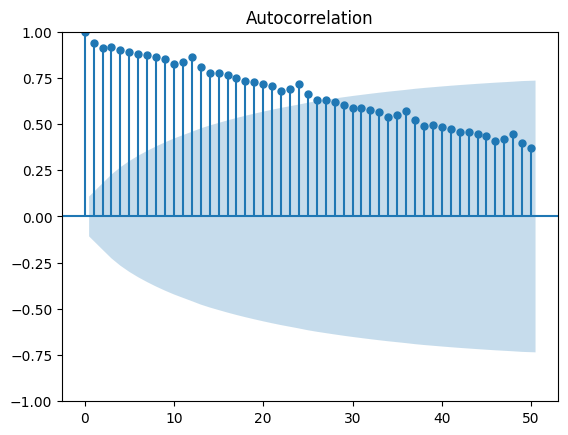

In [60]:
# lags=50
plot_acf(df2['furniture_price_adjusted']);

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [64]:
df

,furniture_price_adjusted
Date,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618
...,...
2019-03-01,9718.107698
2019-04-01,9248.814254
2019-05-01,10001.305304


<AxesSubplot:xlabel='Date'>

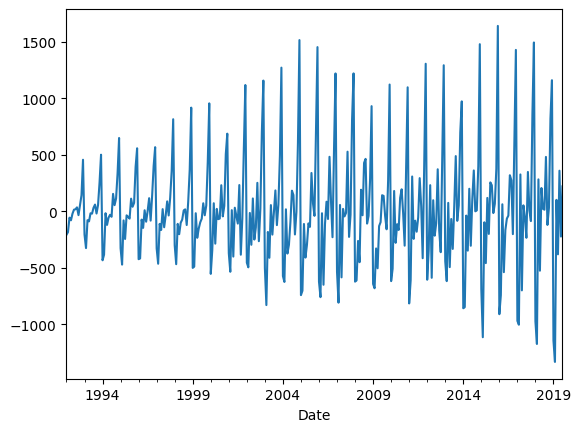

In [66]:
diff = df['furniture_price_adjusted'].diff(1).dropna()
diff.plot()

<AxesSubplot:xlabel='Date'>

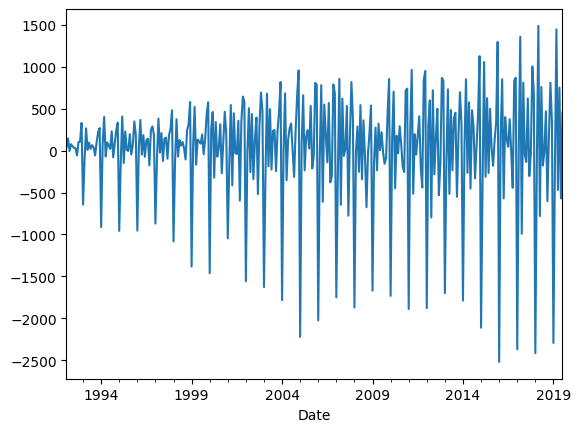

In [69]:
diff = df['furniture_price_adjusted'].diff(1).dropna()
diff.plot()